In [133]:
pip install matplotlib seaborn scikit-learn numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [134]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [135]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Opis merytoryki zbioru danych
Kolumny: 
- age: wiek osoby ubezpieczonej [wartość liczbowa]
- sex: płeć osoby [wartość kategoryczna]
- bmi: wskaźnik masy ciała [wartość liczbowa]
- children: liczba dzieci [wartość liczbowa]
- smoker: czy ubezpieczony pali papierosy [wartość binarna]
- region: region zamieszkania ubezpieczonego [wartość kategoryczna]
- charges: opłaty za ubezpieczenie [wartość liczbowa]

In [136]:
sex_le = LabelEncoder()
smoker_le = LabelEncoder()
region_le = LabelEncoder()
sex_le.fit(df['sex'])
smoker_le.fit(df['smoker'])
region_le.fit(df['region'])

LabelEncoder()

In [137]:
l_df = df
l_df["sex"] = sex_le.transform(l_df["sex"])
l_df["smoker"] = smoker_le.transform(l_df["smoker"])
l_df["region"] = region_le.transform(l_df["region"])
l_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Statystyki opisowe zmiennych

In [138]:
l_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [139]:
l_df.corr()["charges"]

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

# Wykresy rozkładu oraz korelacji zmienych

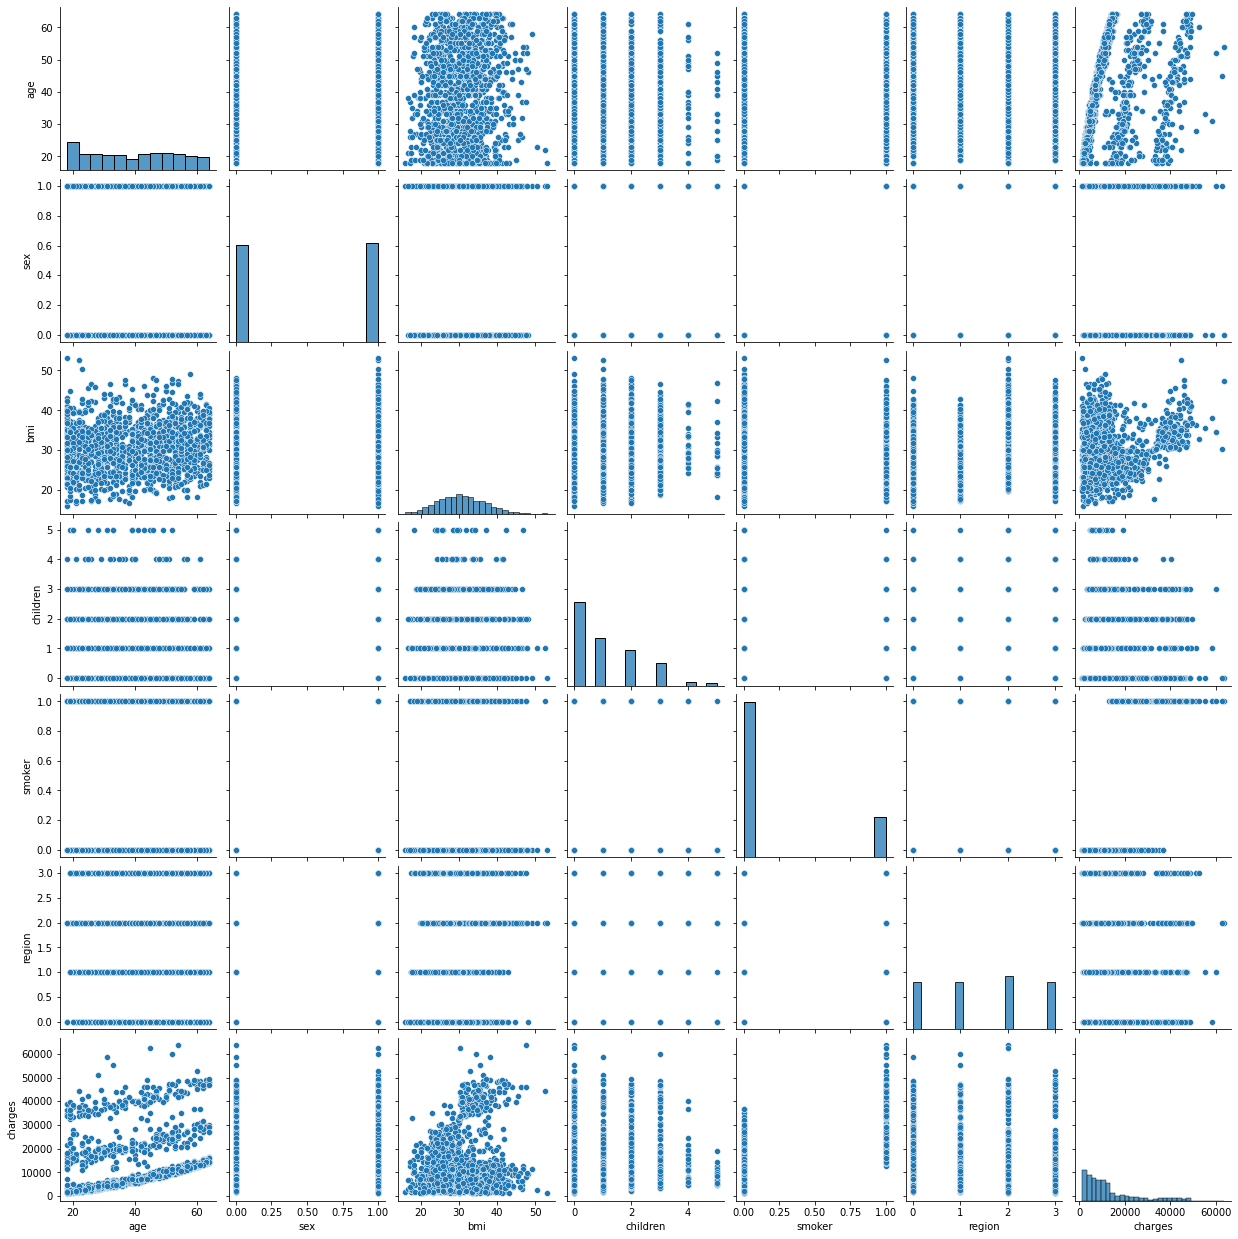

In [140]:
sns.pairplot(l_df)

<AxesSubplot:>

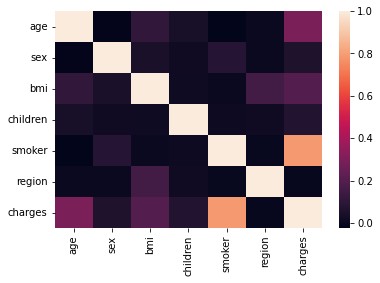

In [141]:
sns.heatmap(l_df.corr())

# Wykres rozkładu zmiennej zależnej

<AxesSubplot:xlabel='charges', ylabel='Count'>

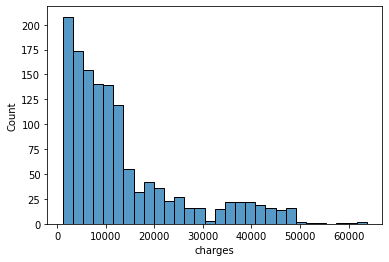

In [142]:
sns.histplot(l_df['charges'])

# Przygotowanie modelu

In [143]:
X = l_df[['age', 'bmi', 'smoker']]
y = l_df['charges']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build model with scikit learn

In [145]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Build model with statsmodel

In [146]:
# model = sm.OLS(y_train, X_train)

# Predykcja

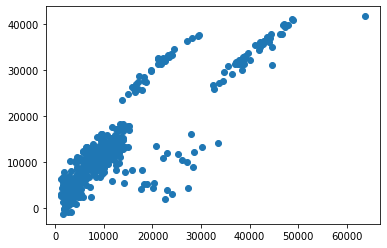

In [147]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\dplas\AppData\Local\Temp;\ipykernel_24756\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


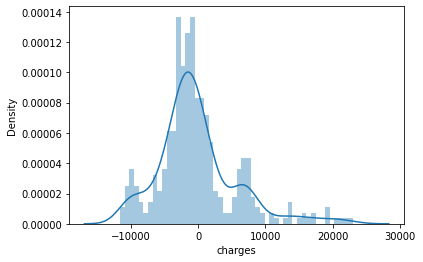

In [148]:
sns.distplot((y_test-predictions),bins=50);

# Evaluation

In [149]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4203.57998268399
MSE: 34382251.77765592
RMSE: 5863.638100842848
